In [13]:
from pathlib import Path
import pandas as pd
pd.options.display.max_columns = 100

import matplotlib.pyplot as plt
import seaborn as sns

DATA_PATH = Path('/mnt/team/rapidresponse/pub/population/modeling/climate_malnutrition/stunting/training_data/2024_06_30.02/data.parquet')


In [27]:
data = pd.read_parquet(DATA_PATH)
for int_var in ['location_id', 'psu']:
    data[int_var] = data[int_var].astype(int)
data['n'] = 1
id_vars = ['location_id', 'year_start', 'year_end', 'psu']
value_vars = ['stunting', 'ldi_pc_pd', 'days_over_30C', 'n']
data = data.groupby(id_vars)[value_vars].sum()
for value_var in value_vars:
    if value_var != 'n':
        data[value_var] /= data['n']
data


stunting  ldi_pc_pd  days_over_30C   n
location_id year_start year_end psu                                        
10          2000       2000     1    0.142857   1.340624           14.0   7
                                2    0.000000   3.099844           14.0   3
                                3    0.500000   4.702325           14.0   2
                                4    0.250000   8.970444           14.0   4
                                5    0.500000   5.992066           14.0   8
...                                       ...        ...            ...  ..
218         2013       2014     326  0.250000   4.201743            0.0  12
                                327  0.000000   5.922350            0.0   4
                                328  0.250000   2.698512            0.0   4
                                329  0.000000   7.892276            0.0   6
                                330  0.153846   1.135323           23.0  13

[91966 rows x 4 columns]

In [22]:
data['n'].describe()


count    91966.000000
mean        10.432116
std          8.239421
min          1.000000
25%          5.000000
50%          8.000000
75%         13.000000
max        118.000000
Name: n, dtype: float64

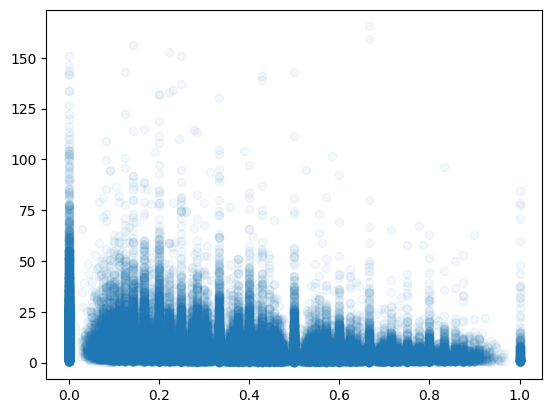

In [29]:
cutoff = data['n'] >= 5
plt.scatter(
    data.loc[cutoff, 'stunting'],
    data.loc[cutoff, 'ldi_pc_pd'],
    alpha=0.05,
)
